In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

## ARMA過程の性質
$\theta_{0}=1, \varepsilon_{t}\sim\mathrm{W.N.}(\sigma^{2})$とする
-  MA(q) process
    $$
    y_{t}=\mu+\sum_{i=0}^{q}\theta_{i}\varepsilon_{t-i}\sim\mathrm{MA}(q)
    $$

- AR(p) process
    $$
    y_{t}=c+\sum_{i=1}^{p}\phi_{i}y_{t-i}+\varepsilon_{t}\sim\mathrm{AR}(p)
    $$

- ARMA(p,q) process
    $$
    y_{t}=c+\sum_{i=1}^{p}\phi_{i}y_{t-i}+\sum_{i=0}^{q}\theta_{i}\varepsilon_{t-i}\sim\mathrm{ARMA}(p,q)
    $$

| モデル | 平均 | 分散 | 自己相関 | 定常性 |
| ---- | ---- | ---- | ---- | ---- |
| MA過程 | $\mathbb{E}[y_{t}]=\mu$ | $\gamma_{0}=\sigma^{2}\sum_{i=0}^{q}\theta_{i}^{2}$<br>$\gamma_{k}=\sigma^{2}\sum_{i=0}^{q-k}\theta_{i}\theta_{i+k},\ (1\leq k\leq q)$<br>$\gamma_{k}=0,\ (k\geq q+1)$ | $\rho_{k}=\dfrac{\sum_{i=0}^{q-k}\theta_{i}\theta_{i+k}}{\sum_{i=0}^{q}\theta_{i}^{2}},\ (1\leq k\leq q)$<br>$\rho_{k}=0,\ (k\geq q+1)$ | 常に定常 |
| **定常**AR過程 | $\mathbb{E}[y_{t}]=\dfrac{c}{1-\sum_{i=1}^{p}\phi_{i}}$ | $\gamma_{0}=\dfrac{\sigma^{2}}{1-\sum_{i=1}^{p}\phi_{i}\rho_{i}}$<br>$\gamma_{k}=\sum_{i=1}^{p}\phi_{i}\gamma_{k-i},\ (k\geq 1)$| $\rho_{k}=\sum_{i=1}^{p}\phi_{i}\rho_{k-i}$| 常に定常 |
| **定常**ARMA過程 | $\mathbb{E}[y_{t}]=\dfrac{c}{1-\sum_{i=1}^{p}\phi_{i}}$ | $\gamma_{k}=\sum_{i=1}^{p}\phi_{i}\gamma_{k-i},\ (k\geq q+1)$| $\rho_{k}=\sum_{i=1}^{p}\phi_{i}\rho_{k-i},\ (k\geq q+1)$| 常に定常 |


## ARMA過程の定常性と反転可能性

- AR過程の定常可能性
    - AR特性方程式
        $$
        1-\sum_{i=1}^{p}\phi_{i}z^{i}=0
        $$
        について、すべての解で$|z|>1$となるとき、AR過程は定常となる。
    - AR過程をMA表現できるとき、AR過程は定常となる。
- MA過程の反転可能性
    - MA特性方程式
        $$
        \sum_{i=0}^{q}\theta_{i}z^{i}=0
        $$
        について、すべての解で$|z|>1$となるとき、MA過程は反転可能となる。
    - MA過程がAR($\infty$)表現できるとき、MA過程は定常となる。
- ARMA過程の定常・反転可能性
    - ARMA過程のAR過程の部分が定常であればARMA過程は定常となる。
    - ARMA過程のMA過程の部分が反転可能であればARMA過程は反転可能となる。

## 問題

### 2.1
AR(2)過程
$$
y_{t}=c+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\varepsilon_{t}
$$
の定常条件を調べる。特性方程式は
$$
1-\phi_{1}z-\phi_{2}z^{2}=0
$$
であるから、この($\phi_{2}$の値にもよるが)2次方程式が$|z|>1$のみに解を持つ条件を調べればよい。
- $\phi_{2}=0$のとき、$\phi_{1}z-1=0$となるので、これが$|z|>1$の解を持つには$\phi_{1}\ne0$かつ$|z|=|1/\phi_{1}|>1$となればよい。これを整理すると$0<|\phi_{1}|<1$となる。
- $\phi_{2}>0$のとき、$z=(-\phi_{1}\pm\sqrt{\phi_{1}^{2}+4\phi_{2}})/(2\phi_{2})$となる。これより$(-\phi_{1}+\sqrt{\phi_{1}^{2}+4\phi_{2}})/(2\phi_{2})>1$かつ$(-\phi_{1}-\sqrt{\phi_{1}^{2}+4\phi_{2}})/(2\phi_{2})<-1$が成り立てばよく、整理すると

In [2]:
df = pd.read_excel('data/economicdata.xls').rename(columns={'Unnamed: 0': 'date'}).set_index('date'); df

,nikkei225,topix,indprod,exrate,cpi,saunemp,intrate
date,,,,,,,
1975-01-01,3767.09,276.09,47.33,29.13,52.625,1.7,12.67
1975-02-01,4100.97,299.81,46.86,29.70,52.723,1.8,13.00
1975-03-01,4300.08,313.50,46.24,29.98,53.114,1.8,12.92
1975-04-01,4435.26,320.57,47.33,29.80,54.092,1.8,12.02
1975-05-01,4506.24,329.65,47.33,29.79,54.385,1.8,11.06
...,...,...,...,...,...,...,...
2004-12-01,11061.32,1110.39,99.91,87.46,98.109,4.5,0.00
2005-01-01,11394.84,1144.09,103.41,88.88,97.913,4.5,0.00
2005-02-01,11545.30,1159.71,101.41,87.72,97.620,4.6,0.00


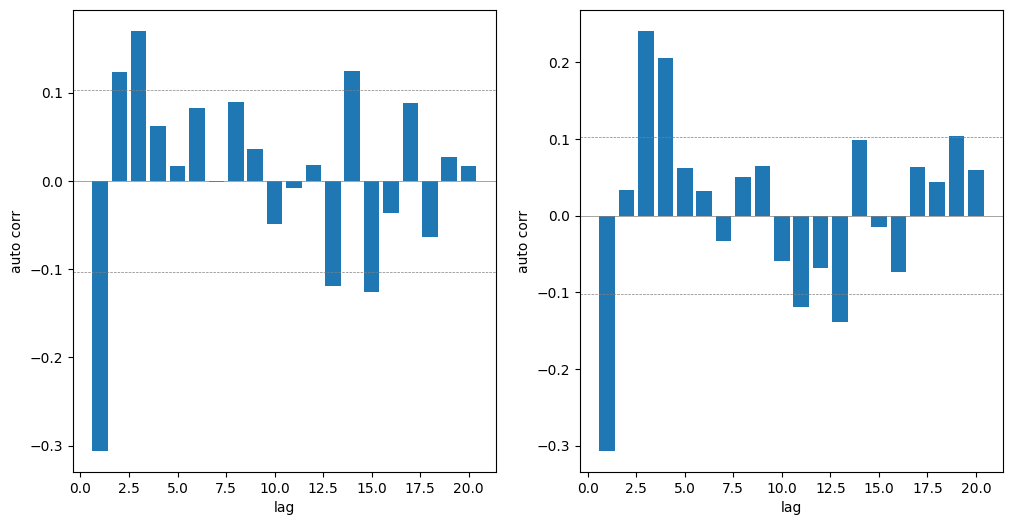

In [21]:
n_lag = 20

fig, axes = plt.subplots(1, 2, figsize=[12, 6])

axes[0].bar(
    np.arange(1, n_lag + 1),
    acf(df.indprod.apply(np.log).diff().dropna(), nlags=20)[1:]
)
axes[0].axhline(1.96 / np.sqrt(df.shape[0]), color='gray', ls='dashed', lw=0.5)
axes[0].axhline(-1.96 / np.sqrt(df.shape[0]), color='gray', ls='dashed', lw=0.5)
axes[0].axhline(0.0, color='gray', lw=0.5)
axes[0].set_xlabel('lag')
axes[0].set_ylabel('auto corr')

axes[1].bar(
    np.arange(1, n_lag + 1),
    pacf(df.indprod.apply(np.log).diff().dropna(), nlags=20)[1:]
)
axes[1].axhline(1.96 / np.sqrt(df.shape[0]), color='gray', ls='dashed', lw=0.5)
axes[1].axhline(-1.96 / np.sqrt(df.shape[0]), color='gray', ls='dashed', lw=0.5)
axes[1].axhline(0.0, color='gray', lw=0.5)
axes[1].set_xlabel('lag')
axes[1].set_ylabel('auto corr')

plt.show()

In [48]:
res = sm.tsa.AutoReg(
    df.indprod.apply(np.log).diff().dropna().values * 100,
    lags=4, trend='c'
).fit()

In [51]:
res.aic / (df.shape[0] - 1), res.bic / (df.shape[0] - 1)

(3.2003689191951596, 3.264556066112321)

In [58]:
orders = [(4,0,0), (0,0,3), (1,0,1), (2,0,1), (1,0,2), (2,0,2)]
res_lst = []
for order in orders:
    res = ARIMA(
        df.indprod.apply(np.log).diff().dropna().values * 100,
        order=order
    ).fit()
    res_lst.append(res)

/home/yoneda/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/yoneda/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [64]:
for i in range(len(orders)):
    # print(f'AIC: {res_lst[i].aic / (df.shape[0] - 1):.4f}')
    print(f'BIC: {res_lst[i].bic / (df.shape[0] - 1):.4f}')

BIC: 3.3053
BIC: 3.3022
BIC: 3.3770
BIC: 3.3404
BIC: 3.2958
BIC: 3.3110


In [69]:
res_lst[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  363
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -582.230
Date:                Fri, 14 Jul 2023   AIC                           1176.460
Time:                        11:19:00   BIC                           1199.826
Sample:                             0   HQIC                          1185.748
                                - 363                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2112      0.083      2.555      0.011       0.049       0.373
ar.L1         -0.3567      0.046     -7.837      0.000      -0.446      -0.267
ar.L2          0.0799      0.051      1.562      0.118      -0.020       0.180
ar.L3          0.3074      0.055      5.620      0.000       0.200       0.415
ar.L4          0.2057      0.049      4.165      0.000       0.109       0.303
sigma2         1.4459      0.100     14.426      0.000       1.249       1.642
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.45
Prob(Q):                              0.85   Prob(JB):                         0.29
Heteroskedasticity (H):               1.26   Skew:                            -0.12
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""